## Calculate f3-stats

1. Outgroup f3-stats script (orig on mpi)
2. Admixture? (orig on mpi)
3. Heatmap! 

## 3A. Heatmap - ANC only!

In [135]:
%%bash
pd="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/"
i="LiangDaoChineseNeolithic"
pop="ANC"
while read i field2 field3; do
    grep result ${pd}UPA_all8.f3.X_Mbuti_S1_${i}_S2_${pop}.log | tr -s ' ' '\t' | cut -f2-6 > ${pd}F3.${i}.${pop}.log
done < ${pd}ANCASN.GPS

grep: /mnt/solexa/mel_yang/2.2_neolithic/f3stats/UPA_all8.f3.X_Mbuti_S1_Tianyuan_S2_ANC.log: No such file or directory


In [165]:
%%writefile /mnt/solexa/mel_yang/2.2_neolithic/f3stats/heatmap_Pontus_meledit_onlyanc.R
args=commandArgs(TRUE)
PREFIX = as.character(args[1])
STATFILE = as.character(args[2])
LABEL = as.character(args[3])
mainlat=as.numeric(args[4])
mainlon=as.numeric(args[5])

X<-read.table(paste(PREFIX,'.GPS',sep=""))
STAT<-read.table(paste(STATFILE,'.log',sep=""))
rownames(X)<-X[,1]
rownames(STAT)<-STAT[,3]
X <- X[intersect(rownames(STAT),rownames(X)),]
STAT <- STAT[intersect(rownames(STAT),rownames(X)),]
if (grepl('F4',STATFILE)) {
X<-cbind(X,STAT[,6])
}
if (grepl('F3',STATFILE)) {
X<-cbind(X,STAT[,5])
}
write.table(X,file=paste(STATFILE,'.map',sep=''),quote=F,row.names=F,col.names=F)

library(fields)
library(RColorBrewer)

padding = 6

data=read.table(paste(STATFILE,'.map',sep=''))

NAMES <- as.character(data[,1])
Latitude<-as.numeric(data[,2])
Longitude<-as.numeric(data[,3])

minLong <- min(Longitude)-5*padding
maxLong <- max(Longitude)+padding
minLat <- min(Latitude)-padding
maxLat <- max(Latitude)+padding

#minLong <- 80-5*padding
#maxLong <- 180.5+padding
#minLat <- -75-padding
#maxLat <- 75+padding
minLong = -187.8
maxLong = 180.5
minLat = -47.3
maxLat = 75.0

minLong = -10
maxLong = 180.5
minLat = 10
maxLat = 75.0

statistic=as.numeric(data[,4])
rgb.palette<-colorRampPalette(c("black","midnightblue","blue","lightskyblue","yellow","gold","red")) #
colours<-rgb.palette(30)

x<-statistic
maxstat =max(statistic)
minstat = min(statistic)

png(paste(STATFILE,'.png',sep=''),width=1440*300/72,height=(maxLat-minLat)*1440*300/(maxLong-minLong)/72,res=300)
cols <- as.character(cut(statistic, breaks = length(colours),labels =colours))
plot(Longitude,Latitude,type="n",main=expression(paste(f[3])),xlim=c(minLong,maxLong),ylim=c(minLat,maxLat), cex.lab=2,cex.axis=2)

library(mapdata)
library(maps)
library(maptools)


map(database='worldHires', fill=TRUE,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)

CASPIAN <- read.table('/home/mel_yang/rcode/Caspian.txt')
polygon(CASPIAN[,2:1],col='white',border='white')

abline(h = mainlat, lty = 2)
abline(v = mainlon, lty = 2)

PCH <- vector(length=length(Longitude))
PCH[1:length(PCH)] <- 22

points(Longitude,Latitude,pch=PCH,bg=cols,col="black",cex=3)
box()


###legend
tempcolours=rev(colours)
#legendposx= 150
legendposx= maxLong-3*padding
legendwidth=2*padding
#legendtop=40
legendtop = maxLat-(maxLat-minLat)/2
legendbottom= minLat+(maxLat-minLat)/10
legendspan=legendtop-legendbottom
legendincrement=legendspan/length(colours)
for(i in 1:length(tempcolours)) {
  rect(legendposx,legendtop-(legendincrement*i),(legendposx+legendwidth),legendtop-(legendincrement*i-legendincrement),col=tempcolours[i],border=NA)
  #text((legendposx+15),(legendtop-(legendincrement*i-legendincrement/2)),"hello")
}
text(legendposx+legendwidth/2,legendtop+(maxLat-minLat)/20,round(maxstat,3),cex=2)
text(legendposx+legendwidth/2,legendbottom-(maxLat-minLat)/20,round(minstat,3),cex=2)
rect(legendposx,legendtop,(legendposx+legendwidth),legendbottom,col=NA)

if (grepl('F4',STATFILE)) {
text(minLong+(maxLong-minLong)/2.5,minLat+2*padding,labels=expression(f[4]),cex=2,adj=0)
text(minLong+(maxLong-minLong)/2.5+1.25,minLat+2*padding,labels=LABEL,cex=2,adj=0)
}

if (grepl('F3',STATFILE)) {
    text(minLong,maxLat-2,labels=expression(f[3]),cex=1.3,adj=0)
    text(minLong+3,maxLat-2,labels=LABEL,cex=1.3,adj=0)
}
 
dev.off()


Overwriting /mnt/solexa/mel_yang/2.2_neolithic/f3stats/heatmap_Pontus_meledit_onlyanc.R


In [168]:
%%bash
pD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/"
gpsdat="ANC"

while read mainind lat lon; do
    outname="F3.${mainind}.ANC"
    Rscript ${pD}heatmap_Pontus_meledit_onlyanc.R ${pD}${gpsdat} ${pD}${outname} '(${mainind}, X; Mbuti)' ${lat} ${lon}
done < ${pD}ANCASN.GPS


null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 


Loading required package: methods
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: methods
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( 

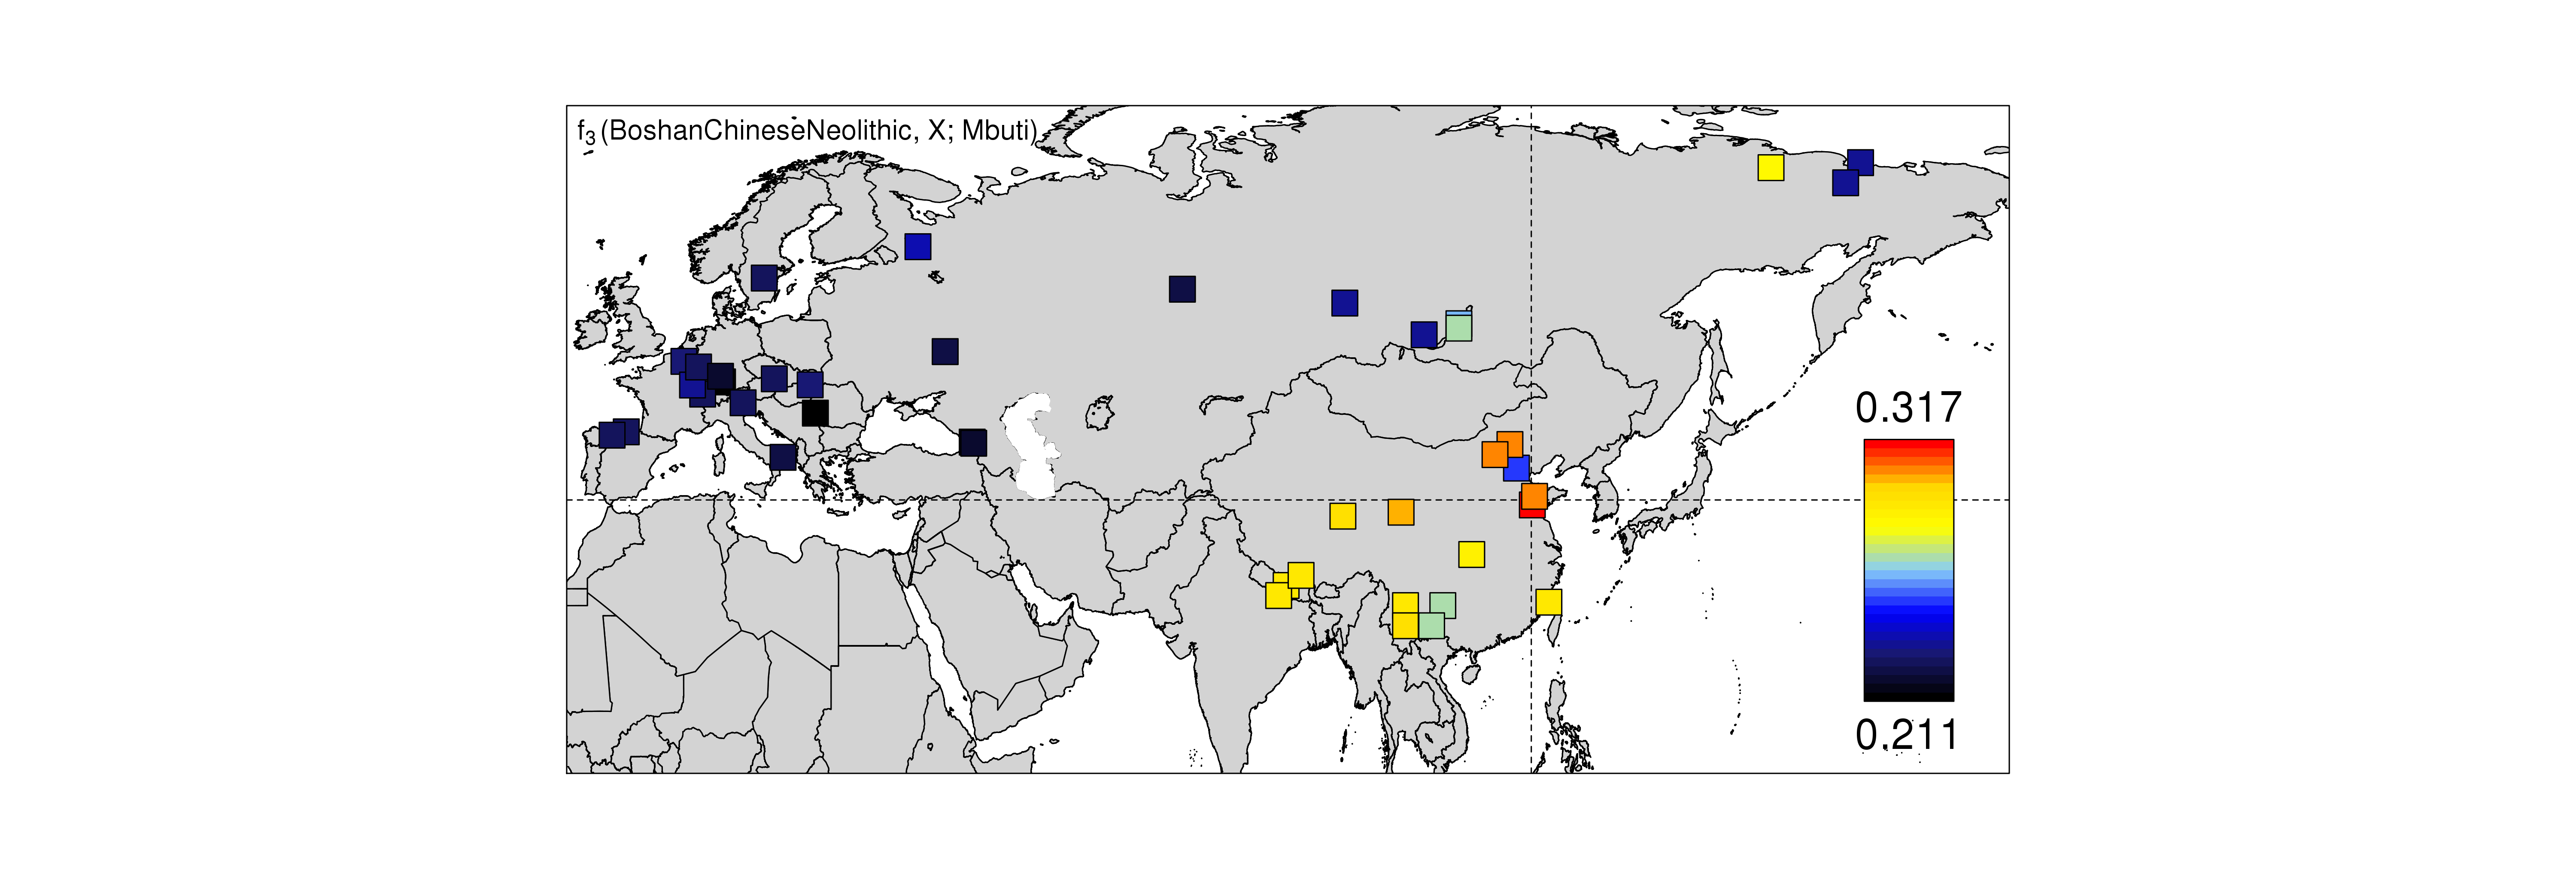

In [167]:
from IPython.display import Image
pD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/"
outname="F3.BoshanChineseNeolithic.ANC"
Image(filename=pD+outname+'.png') 
#outname="transv.F3.ANCSGDP"
#Image(filename=pD+outname+'.png') 

## 3B. Heatmap - SGDP only!

In [141]:
%%writefile /mnt/solexa/mel_yang/2.2_neolithic/f3stats/heatmap_Pontus_meledit_onlypresent.R
args=commandArgs(TRUE)
PREFIX = as.character(args[1])
STATFILE = as.character(args[2])
LABEL = as.character(args[3])
mainlat=as.numeric(args[4])
mainlon=as.numeric(args[5])

X<-read.table(paste(PREFIX,'.GPS',sep=""))
STAT<-read.table(paste(STATFILE,'.log',sep=""))
rownames(X)<-X[,1]
rownames(STAT)<-STAT[,3]
X <- X[intersect(rownames(STAT),rownames(X)),]
STAT <- STAT[intersect(rownames(STAT),rownames(X)),]
if (grepl('F4',STATFILE)) {
X<-cbind(X,STAT[,6])
}
if (grepl('F3',STATFILE)) {
X<-cbind(X,STAT[,5])
}
write.table(X,file=paste(STATFILE,'.map',sep=''),quote=F,row.names=F,col.names=F)

library(fields)
library(RColorBrewer)

padding = 6

data=read.table(paste(STATFILE,'.map',sep=''))

NAMES <- as.character(data[,1])
Latitude<-as.numeric(data[,2])
Longitude<-as.numeric(data[,3])

minLong <- min(Longitude)-5*padding
maxLong <- max(Longitude)+padding
minLat <- min(Latitude)-padding
maxLat <- max(Latitude)+padding

#minLong <- 80-5*padding
#maxLong <- 180.5+padding
#minLat <- -75-padding
#maxLat <- 75+padding
minLong = -187.8
maxLong = 180.5
minLat = -47.3
maxLat = 75.0

print(c(minLat,maxLat))
print(c(minLong,maxLong))
statistic=as.numeric(data[,4])
print (max(statistic))
print (min(statistic))
rgb.palette<-colorRampPalette(c("black","midnightblue","blue","lightskyblue","yellow","gold","red")) #
colours<-rgb.palette(30)

x<-statistic
maxstat =max(statistic)
minstat = min(statistic)

png(paste(STATFILE,'.png',sep=''),width=1440*300/72,height=(maxLat-minLat)*1440*300/(maxLong-minLong)/72,res=300)
cols <- as.character(cut(statistic, breaks = length(colours),labels =colours))
plot(Longitude,Latitude,type="n",main=expression(paste(f[3])),xlim=c(minLong,maxLong),ylim=c(minLat,maxLat), cex.lab=2,cex.axis=2)

library(mapdata)
library(maps)
library(maptools)


map(database='worldHires', fill=TRUE,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)

CASPIAN <- read.table('/home/mel_yang/rcode/Caspian.txt')
polygon(CASPIAN[,2:1],col='white',border='white')

abline(h = mainlat, lty = 2)
abline(v = mainlon, lty = 2)

PCH <- vector(length=length(Longitude))
PCH[1:length(PCH)] <- 21

points(Longitude,Latitude,pch=PCH,bg=cols,col="black",cex=3)
box()


###legend
tempcolours=rev(colours)
#legendposx= 150
legendposx= minLong+padding
legendwidth=2*padding
#legendtop=40
legendtop = maxLat-(maxLat-minLat)/2
legendbottom= minLat+(maxLat-minLat)/10
legendspan=legendtop-legendbottom
legendincrement=legendspan/length(colours)
for(i in 1:length(tempcolours)) {
  rect(legendposx,legendtop-(legendincrement*i),(legendposx+legendwidth),legendtop-(legendincrement*i-legendincrement),col=tempcolours[i],border=NA)
  #text((legendposx+15),(legendtop-(legendincrement*i-legendincrement/2)),"hello")
}
text(legendposx+legendwidth/2,legendtop+(maxLat-minLat)/20,round(maxstat,3),cex=2)
text(legendposx+legendwidth/2,legendbottom-(maxLat-minLat)/20,round(minstat,3),cex=2)
rect(legendposx,legendtop,(legendposx+legendwidth),legendbottom,col=NA)

if (grepl('F4',STATFILE)) {
text(minLong+(maxLong-minLong)/2.5,minLat+2*padding,labels=expression(f[4]),cex=2,adj=0)
text(minLong+(maxLong-minLong)/2.5+1.25,minLat+2*padding,labels=LABEL,cex=2,adj=0)
}

if (grepl('F3',STATFILE)) {
text(minLong+(maxLong-minLong)/2.5,minLat+padding,labels=expression(f[3]),cex=2,adj=0)
text(minLong+(maxLong-minLong)/2.5+6,minLat+padding,labels=LABEL,cex=2,adj=0)
}
 
dev.off()


Overwriting /mnt/solexa/mel_yang/2.2_neolithic/f3stats/heatmap_Pontus_meledit_onlypresent.R


In [128]:
%%bash
pd="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/"
i="LiangDaoChineseNeolithic"
pop="SGDP"
while read i field2 field3; do
    grep result ${pd}UPA_all8.f3.X_Mbuti_S1_${i}_S2_${pop}.log | tr -s ' ' '\t' | cut -f2-6 > ${pd}F3.${i}.${pop}.log
done < ${pd}ANCASN.GPS


grep: /mnt/solexa/mel_yang/2.2_neolithic/f3stats/UPA_all8.f3.X_Mbuti_S1_Tianyuan_S2_SGDP.log: No such file or directory


In [142]:
%%bash
pD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/"
gpsdat="F3.SGDP"

while read mainind lat lon; do
    outname="F3.${mainind}.SGDP"
    Rscript ${pD}heatmap_Pontus_meledit_onlypresent.R ${pD}${gpsdat} ${pD}${outname} "(${mainind}, X; Mbuti)" ${lat} ${lon}
done < ${pD}ANCASN.GPS


[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.299612
[1] 0.04133
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.303595
[1] 0.041578
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.305351
[1] 0.041083
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.298125
[1] 0.042767
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.309812
[1] 0.042018
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.297819
[1] 0.041322
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.293396
[1] 0.04148
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.274538
[1] 0.043561
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.274419
[1] 0.041588
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.29532
[1] 0.041526
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.294502
[1] 0.040711
null device 
          1 
[1] -47.3  75.0
[1] -187.8  180.5
[1] 0.285374
[1] 0.0396

Loading required package: methods
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: methods
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( 

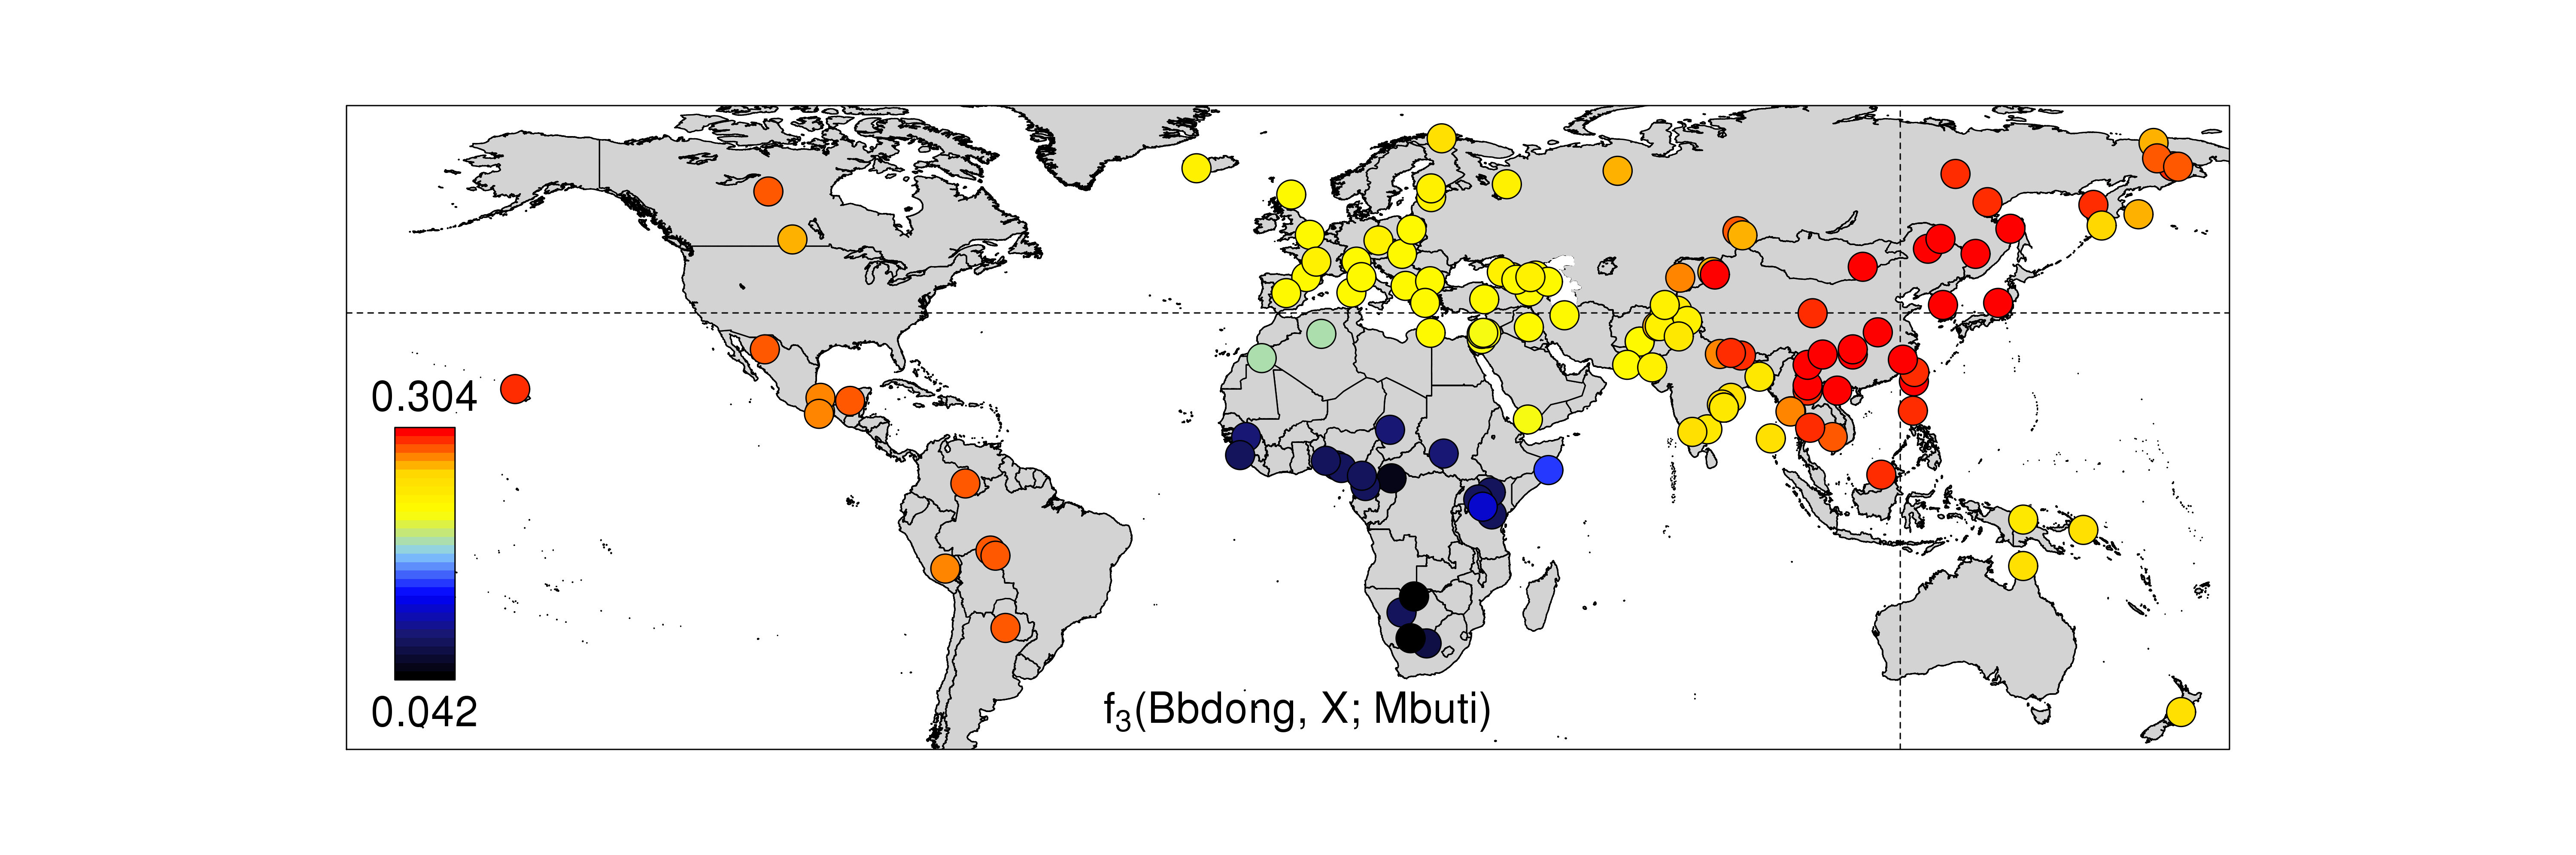

In [143]:
from IPython.display import Image
pD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/"
outname="F3.Bbdong.SGDP"
Image(filename=pD+outname+'.png') 
#outname="transv.F3.ANCSGDP"
#Image(filename=pD+outname+'.png') 

## 2. Admixture? (orig on mpi)
```bash
grep result UPA_all8.f3.X_ASNEUR_S1_ASNEUR_S2_ASNEUR.log | awk '{ if ($7<-3) print $2,'\t',$3,'\t',$4,'\t',$5,'\t',$7}' | grep -v Maori | grep -v Chukchi | grep -v Burmese | grep -v Uygur | grep -v Kyrgyz | grep -v Thai | grep -v Cree
```

In [ ]:
%%writefile /mnt/solexa/mel_yang/2.2_neolithic/f3stats/calcf3_admix.py

import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

eas=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian","Tibetan","Uygur"]
samer=["Clovis","Pima","Mayan","Mixe","Zapotec","Piapoco",
        "Karitiana","Surui","Quechua","Chane","Nahua",
        "Cree","Chipewyan",'Saqqaq']
sib=["Aleut","Tlingit","Mansi","Chukchi","Tubalar","Kyrgyz","Ulchi",
    "Mongola","Altaian","Even","Yakut","Itelman",
    "Eskimo_Sireniki","Eskimo_Naukan","Eskimo_Chaplin"]
pacific=["Onge","Papuan","Maori","Igorot","Hawaiian",
         "Dusun","Bougainville","Australian"]
oasia=["Sherpa","Kusunda"]
ancids=['Yana_old','Yana_old2',"Tianyuan",'Longlin','Longlin_com','Xinyi',
        'Xinyi_other','Daxi','LiangDaoChineseNeolithic','Boisman_MN',
        'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',
        'Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong',
        'Kolyma_River',"Donghuigou","Balikun"]
eup=["UstIshim","Oase1","Tianyuan","Kostenki14","GoyetQ116-1",
     "Vestonice16","Yana_old","Yana_old2",
     "Malta1",'AfontovaGora3',"ElMiron","Villabruna","Bichon",
     "Satsurblia","Kotias","Karelia","Motala12","Loschbour","LaBrana1",
     "Hungarian.KO1","Stuttgart","French","Sardinian","Saami"]
allids=eup+eas+ancids+samer+sib+pacific+oasia


#pD="/home/melinda_yang/data/2.2M/" ##mpi
#outpD="/home/melinda_yang/projects/bronzeage/2.2M_analysis/Longlin_Xinyi_analysis/f3stats/" ##mpi
pD="/mnt/solexa/mel_yang/2.2M/" ##ivpp
outpD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/" ##ivpp

fh = 'UPA_all8'
subset = 'X_ASNEUR_S1_ASNEUR_S2_ASNEUR'

AB = [(i,j) for i in allids for j in allids ]
Xs = allids
%%writefile /mnt/solexa/mel_yang/2.2_neolithic/f3stats/calcoutf3.py

import sys
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

eas=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian","Tibetan","Uygur"]
samer=["Clovis","Pima","Mayan","Mixe","Zapotec","Piapoco",
        "Karitiana","Surui","Quechua","Chane","Nahua",
        "Cree","Chipewyan",'Saqqaq']
sib=["Aleut","Tlingit","Mansi","Chukchi","Tubalar","Kyrgyz","Ulchi",
    "Mongola","Altaian","Even","Yakut","Itelman",
    "Eskimo_Sireniki","Eskimo_Naukan","Eskimo_Chaplin"]
pacific=["Onge","Papuan","Maori","Igorot","Hawaiian",
         "Dusun","Bougainville","Australian"]
oasia=["Sherpa","Kusunda"]
ancids=['Yana_old','Yana_old2',"Tianyuan",'Longlin','Longlin_com','Xinyi',
        'Xinyi_other','Daxi','LiangDaoChineseNeolithic','Boisman_MN',
        'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',
        'Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong',
        'Kolyma_River',"Donghuigou","Balikun"]
eup=["UstIshim","Oase1","Tianyuan","Kostenki14","GoyetQ116-1",
     "Vestonice16","Yana_old","Yana_old2",
     "Malta1",'AfontovaGora3',"ElMiron","Villabruna","Bichon",
     "Satsurblia","Kotias","Karelia","Motala12","Loschbour","LaBrana1",
     "Hungarian.KO1","Stuttgart","French","Sardinian","Saami"]
allids=eup+eas+ancids+samer+sib+pacific+oasia


#pD="/home/melinda_yang/data/2.2M/" ##mpi
#outpD="/home/melinda_yang/projects/bronzeage/2.2M_analysis/Longlin_Xinyi_analysis/f3stats/" ##mpi
pD="/mnt/solexa/mel_yang/2.2M/" ##ivpp
outpD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/" ##ivpp
fh = 'UPA_all8'
subset = 'X_Mbuti_S1_%s_S2_ASNEUR' % sys.argv[1]

AB = [(i,j) for i in [sys.argv[1]] for j in allids ]
Xs = ["Mbuti"]

pm.f3popfile(AB, Xs, pD+fh, subset)
pm.f3parfile(pD+fh,subset)
outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
print mycommand1
varfile = Popen(mycommand1.split())
varfile.communicate()
mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
print 'Running command', mycommand

varfile = Popen(mycommand.split(), stdout = outfile)
varfile.communicate()
outfile.close()

pm.f3popfile(AB, Xs, pD+fh, subset)
pm.f3parfile(pD+fh,subset)
outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
print mycommand1
varfile = Popen(mycommand1.split())
varfile.communicate()
mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
print 'Running command', mycommand

varfile = Popen(mycommand.split(), stdout = outfile)
varfile.communicate()
outfile.close()

## 1. Outgroup f3-stats script (orig on mpi)

In [10]:
%%writefile /mnt/solexa/mel_yang/2.2_neolithic/f3stats/calcoutf3_SGDP.py

import sys
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

sgdp=open("/mnt/solexa/mel_yang/2.2_neolithic/pca/SGDP_ALL.txt",'r')
allids=[line.strip() for line in sgdp]

#pD="/home/melinda_yang/data/2.2M/" ##mpi
#outpD="/home/melinda_yang/projects/bronzeage/2.2M_analysis/Longlin_Xinyi_analysis/f3stats/" ##mpi
pD="/mnt/solexa/mel_yang/data/2.2M/" ##ivpp
outpD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/" ##ivpp
fh = 'UPA_all8'
subset = 'X_Mbuti_S1_%s_S2_SGDP' % sys.argv[1]

AB = [(i,j) for i in [sys.argv[1]] for j in allids ]
Xs = ["Mbuti"]

pm.f3popfile(AB, Xs, outpD+fh, subset)
pm.f3parfile(pD,fh,subset,outpd=outpD)
outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
#mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
#print mycommand1
#varfile = Popen(mycommand1.split())
#varfile.communicate()
mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
print 'Running command', mycommand

varfile = Popen(mycommand.split(), stdout = outfile)
varfile.communicate()
outfile.close()

Overwriting /mnt/solexa/mel_yang/2.2_neolithic/f3stats/calcoutf3_SGDP.py


In [12]:
%%writefile /mnt/solexa/mel_yang/2.2_neolithic/f3stats/calcoutf3.py

import sys
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

ancasn=['Yana_old','Yana_old2',"Tianyuan",'Longlin','Longlin_com','Xinyi',
        'Xinyi_other','Daxi','LiangDaoChineseNeolithic','Boisman_MN',
        'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',
        'Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong',
        'Kolyma_River',"Donghuigou","Balikun"]
eup=["UstIshim","Oase1","Kostenki14","GoyetQ116-1",
     "Vestonice16","Ostuni1","HohleFels49",
     "Malta1",'AfontovaGora3',"ElMiron","Villabruna","Bichon","Rochedane","Ranchot88",
     "Satsurblia","Kotias","Karelia","Motala12","Loschbour","LaBrana1",
     "Hungarian.KO1","Stuttgart"]
allids=eup+ancasn


#pD="/home/melinda_yang/data/2.2M/" ##mpi
#outpD="/home/melinda_yang/projects/bronzeage/2.2M_analysis/Longlin_Xinyi_analysis/f3stats/" ##mpi
pD="/mnt/solexa/mel_yang/data/2.2M/" ##ivpp
outpD="/mnt/solexa/mel_yang/2.2_neolithic/f3stats/" ##ivpp
fh = 'UPA_all8'
subset = 'X_Mbuti_S1_%s_S2_ANC' % sys.argv[1]

AB = [(i,j) for i in [sys.argv[1]] for j in allids ]
Xs = ["Mbuti"]

pm.f3popfile(AB, Xs, outpD+fh, subset)
pm.f3parfile(pD,fh,subset,outpd=outpD)
outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
print 'Running command', mycommand

varfile = Popen(mycommand.split(), stdout = outfile)
varfile.communicate()
outfile.close()


Overwriting /mnt/solexa/mel_yang/2.2_neolithic/f3stats/calcoutf3.py


In [169]:
pm.f3parfile??